<a href="https://colab.research.google.com/github/IAlam0819/COVID-19-Patients-Detection-and-Triaging/blob/main/multiclass_covid_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/dataset/datasets_622594_1110630_COVID-19.xlsx')
df.head()

,Sno,age,gender,body temperature,Dry Cough,sour throat,weakness,breathing problem,drowsiness,pain in chest,travel history to infected countries,diabetes,heart disease,lung disease,stroke or reduced immunity,symptoms progressed,high blood pressue,kidney disease,change in appetide,Loss of sense of smell,Corona result
0,1,20,1,98.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,19,1,99.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,55,0,102.0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1
3,4,40,0,100.0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,1,0,2
4,5,33,1,99.2,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,1,2


In [ ]:
df = df.iloc[:, 1:]
df.head()

,age,gender,body temperature,Dry Cough,sour throat,weakness,breathing problem,drowsiness,pain in chest,travel history to infected countries,diabetes,heart disease,lung disease,stroke or reduced immunity,symptoms progressed,high blood pressue,kidney disease,change in appetide,Loss of sense of smell,Corona result
0,20,1,98.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19,1,99.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,55,0,102.0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1
3,40,0,100.0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,1,0,2
4,33,1,99.2,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,1,2


In [ ]:
#shape of the data
df.shape

(127, 20)

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].unique())

age
[20 19 55 40 33 51 80 52 53 54 56 57 58 59 60 61 62 63 64 65 66 67 23 30
 18 24 37 22 29 31 45 39 44 36 28 21 32 35 27 25 26 41 48 42 38 46 34 47]
gender
[1 0]
body temperature
[ 98.6  99.  102.  100.   99.2 101.   98.8  99.6  96.   96.5  98.1  97.3
  98.9 102.1 102.3 101.3  97.9 102.2 103.1 100.1  99.3 101.5  98.4 102.4
 101.1  99.7 100.4 102.9  99.1]
Dry Cough
[0 1]
sour throat
[0 1]
weakness
[0 1]
breathing problem
[0 1]
drowsiness
[0 1]
pain in chest
[0 1]
travel history to infected countries
[0 1]
diabetes
[0 1]
heart disease
[0 1]
lung disease
[0 1]
stroke or reduced immunity
[0 1]
symptoms progressed
[0 1]
high blood pressue
[0 1]
kidney disease
[0 1]
change in appetide
[0 1]
Loss of sense of smell
[0 1]
Corona result
[0 1 2]


In [ ]:
#missing values
df.isnull().sum()

age                                     0
gender                                  0
body temperature                        0
Dry Cough                               0
sour throat                             0
weakness                                0
breathing problem                       0
drowsiness                              0
pain in chest                           0
travel history to infected countries    0
diabetes                                0
heart disease                           0
lung disease                            0
stroke or reduced immunity              0
symptoms progressed                     0
high blood pressue                      0
kidney disease                          0
change in appetide                      0
Loss of sense of smell                  0
Corona result                           0
dtype: int64

In [ ]:
df.dtypes

age                                       int64
gender                                    int64
body temperature                        float64
Dry Cough                                 int64
sour throat                               int64
weakness                                  int64
breathing problem                         int64
drowsiness                                int64
pain in chest                             int64
travel history to infected countries      int64
diabetes                                  int64
heart disease                             int64
lung disease                              int64
stroke or reduced immunity                int64
symptoms progressed                       int64
high blood pressue                        int64
kidney disease                            int64
change in appetide                        int64
Loss of sense of smell                    int64
Corona result                             int64
dtype: object

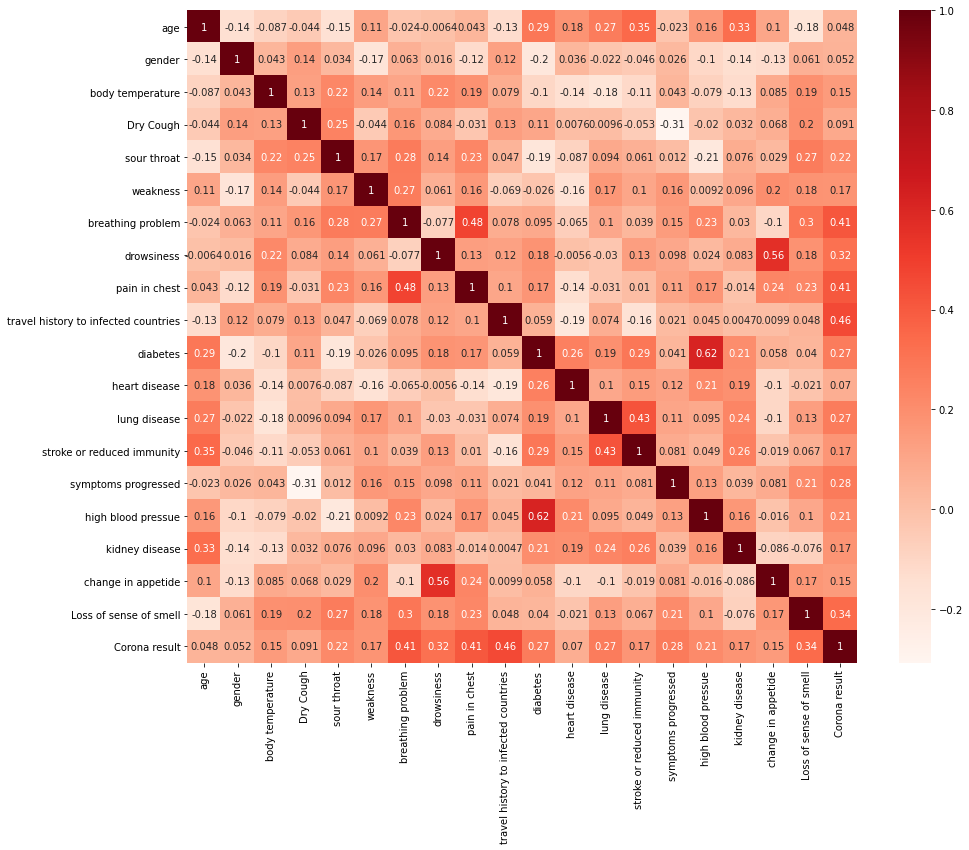

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(15,12))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with target variable
cor_target = abs(cor["Corona result"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features

breathing problem                       0.412471
drowsiness                              0.317234
pain in chest                           0.411084
travel history to infected countries    0.462629
diabetes                                0.271150
lung disease                            0.272917
symptoms progressed                     0.277390
Loss of sense of smell                  0.343295
Corona result                           1.000000
Name: Corona result, dtype: float64

In [ ]:
data = df[['breathing problem', 'drowsiness', 'pain in chest', 'travel history to infected countries', 'Loss of sense of smell',
            'Corona result', 'body temperature', 'Dry Cough', 'symptoms progressed', 'diabetes']]

In [ ]:
# independant variables
col = list(data.columns)
features = list(set(col) - set(['Corona result']))
x = data[features].values
# the dependent variable
y = data['Corona result'].values
print("Shape of x: ",x.shape)
print("Shape of y: ",y.shape)

Shape of x:  (127, 9)
Shape of y:  (127,)


In [ ]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (101, 9)
Shape of x_test:  (26, 9)
Shape of y_train:  (101,)
Shape of y_test:  (26,)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_train)
# Apply transform to both the training set and the test set.
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression(solver = 'lbfgs')
model.fit(x_train, y_train)

# use the model to make predictions with the test data
pred = model.predict(x_test)
# how did our model perform?
count_misclassified = (y_test != pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 5
Accuracy: 0.81


In [ ]:
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)

[[ 4  3  0]
 [ 0 15  1]
 [ 0  1  2]]


In [ ]:
#classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.79      0.94      0.86        16
           2       0.67      0.67      0.67         3

    accuracy                           0.81        26
   macro avg       0.82      0.73      0.75        26
weighted avg       0.83      0.81      0.80        26

